In [1]:
# @Author: Apeksha
# Approach: Using sklearn MultiOutputClassifier generating multiple label output.
# Script: For actual testing

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [3]:
#Method to read dataset
def read_dataset(path):
    return pd.read_csv(path,header="infer",sep=",",low_memory=False)

In [4]:
# Method to train the model
# Params- Estimator: Classifier being used for classification
#         X_train: input features
#         Y_train: input labels
#Return- Trained model of type Estimator 
def fit_model(estimator,X_train, y_train):
    print('Inside fit_model', X_train.shape,' labels: ',y_train.shape)
    return MultiOutputClassifier(estimator).fit(X_train, y_train)

# Method to make the predictions
# Params- Model: Trained model
#         X_test: Test data
#Return-  A list of labels per record. [[],[],[],[]] of shape 82117 * 27
def predict_poistion(model,X_test):
    print('Inside prediction: ',X_test.shape)
    return model.predict(X_test)

# Method to get model evaluation paramaters
def print_classification_report(predictions,actual_labels):
    print("actual_labels: ",actual_labels.shape)
    print(classification_report(actual_labels, predictions))
    
# Method to write predictions to a text file.
def generate_output_file(predictions):
    output_path="output.txt"
    with open(output_path, 'w') as filehandle:
        filehandle.writelines("%s\n" % label for label in predictions)
        
#Model definition for cross validation.
#values in this list is in the form ("model_name",model)
all_models=[]

In [5]:
# Define logistic regression model params for cross validation
def create_lr_model(train_df,train_label_df):
    lr_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=None, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)
    lr_model=fit_model(lr_estimator,train_df, train_label_df)
    all_models.append(("LR",lr_model))

In [6]:
# Define Random Forest model params for cross validation
def create_rf_model(train_df,train_label_df):
    rf_estimator=RandomForestClassifier(n_estimators=100,bootstrap = True,max_features = 'sqrt')
    rf_model=fit_model(rf_estimator,train_df, train_label_df)
    all_models.append(("RF",rf_model))

In [7]:
# Define KNN model params for cross validation
def create_knn_model(train_df,train_label_df):
    knn_estimator=KNeighborsClassifier(n_neighbors=3)
    knn_model=fit_model(knn_estimator,train_df, train_label_df)
    all_models.append(("KNN",knn_model))

In [8]:
# Method to plot graphs 
%matplotlib inline
import matplotlib.pyplot as plt
# model_names=["LR","RF","KNN"]
# f1_scores=[lr_f1_score,rf_f1_score,knn_f1_score]
def compare_f1_scores(model_names,f1_scores):
    y_pos = np.arange(len(model_names))
    plt.bar(y_pos, f1_scores, align='center', alpha=0.5)
    plt.xticks(y_pos, model_names)
    plt.ylabel('F1 Scores')
    plt.title('Classifiers')
    plt.show()

In [9]:
#set path to read the processed features files

train_path=r"players.csv"
train_label_path=r"train_labels.csv"
train_df=read_dataset(train_path)
train_label_df=read_dataset(train_label_path)

#train_df=train_df.head(100)
#train_label_df=train_label_df.head(100)

In [10]:
create_lr_model(train_df,train_label_df)
create_rf_model(train_df,train_label_df)
create_knn_model(train_df,train_label_df)


Inside fit_model (100, 105)  labels:  (100, 27)
Inside fit_model (100, 105)  labels:  (100, 27)
Inside fit_model (100, 105)  labels:  (100, 27)


Validating model:  LR
[0.2 0.4 0.5 0.4 0.5 0.4 0.3 0.5 0.7 0.7]
Validating model:  RF
[0.5 0.5 0.6 0.5 0.5 0.5 0.6 0.5 0.6 0.5]
Validating model:  KNN
[0.3 0.5 0.6 0.6 0.5 0.5 0.5 0.5 0.7 0.5]


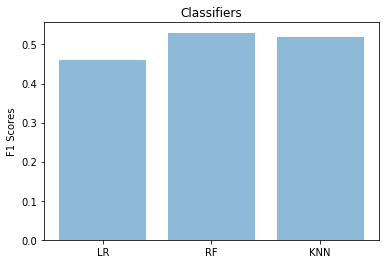

In [12]:
# Method to perform cross validation on all the three models and compare the results.
from sklearn import model_selection
results = []
names = []
scoring = 'accuracy'

# evaluate each model in turn
for name,model in all_models:
    print("Validating model: ",name)
    kfold = model_selection.KFold(n_splits=10, random_state=0.11)
    cv_results = model_selection.cross_val_score(model, train_df, train_label_df, cv=kfold, scoring=scoring)
    print(cv_results)
    results.append(np.average(cv_results))
    names.append(name) 

compare_f1_scores(names,results)

In [13]:
# To generate the percentage table for all the model scores.
score_df=pd.DataFrame(data=[results],columns=names,index=["Scores"])
score_df=score_df*100
score_df=score_df.round(2)
score_df.loc[0]=results
score_df.head(1)

[0.4600000000000001, 0.53, 0.52]
['LR', 'RF', 'KNN']


,LR,RF,KNN
Scores,46.0,53.0,52.0
